## Case Study 7 DS7333 

##### Team Members:
- Benjamin Goodwin
- Lijju Mathew
- Pradeep Kumar
- Sid Swarupananda

### Business Understanding
This case study is for a client who wants to minimize the monetary loss of their customers. So, every case of false positive incurs a \\$100 loss and a case of false negative incurs a \\$25 losss. The goal is to predict the class that minimizes the financial loss.

In [96]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Evaluation

In [97]:
raw_data= pd.read_csv("/Users/lijjumathew/Downloads/final_project.csv")

In [98]:
raw_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [99]:
raw_data.shape[0], raw_data.shape[1]

(160000, 51)

In [100]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [101]:
# Checking the categorical variables 
raw_data.loc[:,['x24','x29','x30','x32','x37']]

,x24,x29,x30,x32,x37
0,euorpe,July,tuesday,0.0%,$1313.96
1,asia,Aug,wednesday,-0.02%,$1962.78
2,asia,July,wednesday,-0.01%,$430.47
3,asia,July,wednesday,0.01%,$-2366.29
4,asia,July,tuesday,0.01%,$-620.66
...,...,...,...,...,...
159995,asia,Aug,wednesday,0.0%,$-891.96
159996,asia,May,wednesday,-0.01%,$1588.65
159997,asia,Jun,wednesday,-0.0%,$687.46
159998,asia,May,wednesday,-0.02%,$439.21


In [102]:
# Converting the x37(dollar amounts) and x32(percentages) into numerical/continous features
raw_data['x37'] = raw_data['x37'].str.replace('[$,]', '',regex=True).astype('float')
raw_data['x32'] = raw_data['x32'].str.replace('[%,]', '',regex=True).astype('float')

In [103]:
raw_data.loc[:,['x32','x37']]

,x32,x37
0,0.00,1313.96
1,-0.02,1962.78
2,-0.01,430.47
3,0.01,-2366.29
4,0.01,-620.66
...,...,...
159995,0.00,-891.96
159996,-0.01,1588.65
159997,-0.00,687.46
159998,-0.02,439.21


In [104]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [105]:
# Check if the target variable is a balanced dataset.
raw_data['y'].value_counts(normalize=False)

0    95803
1    64197
Name: y, dtype: int64

In [106]:
# Check if there are missing values
raw_data.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [107]:
# Check if there are duplicates.
raw_data.duplicated().sum()

0

In [108]:
categorical_cols = ['x24','x29','x30']

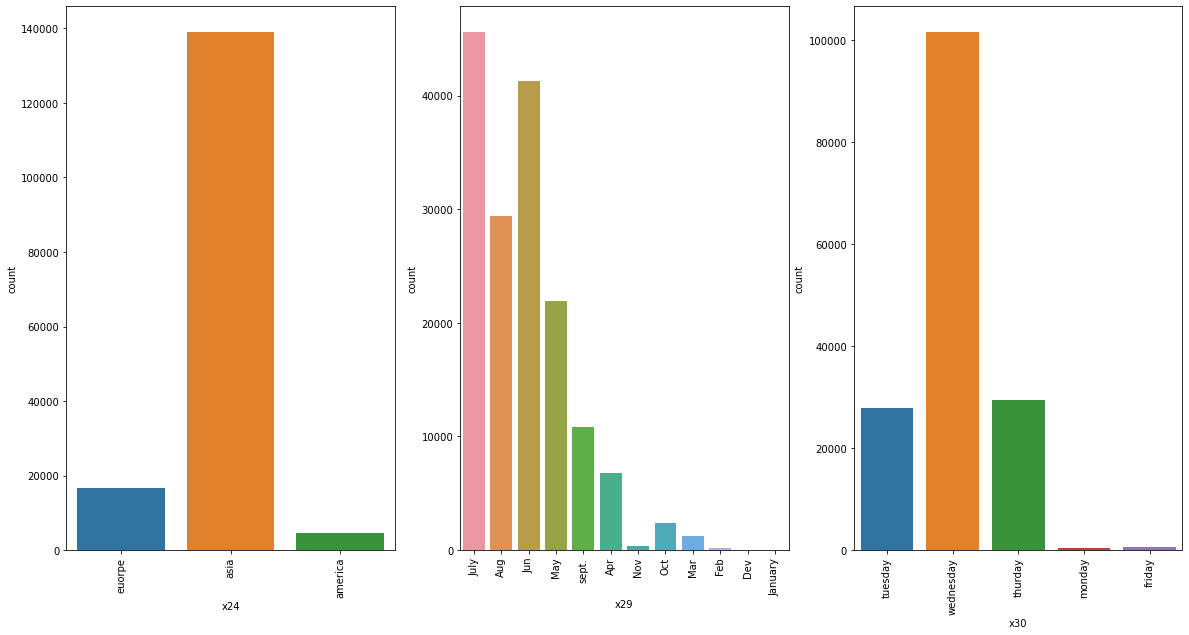

In [109]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for variable, subplot in zip(categorical_cols, ax.flatten()):
    sns.countplot(x = raw_data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

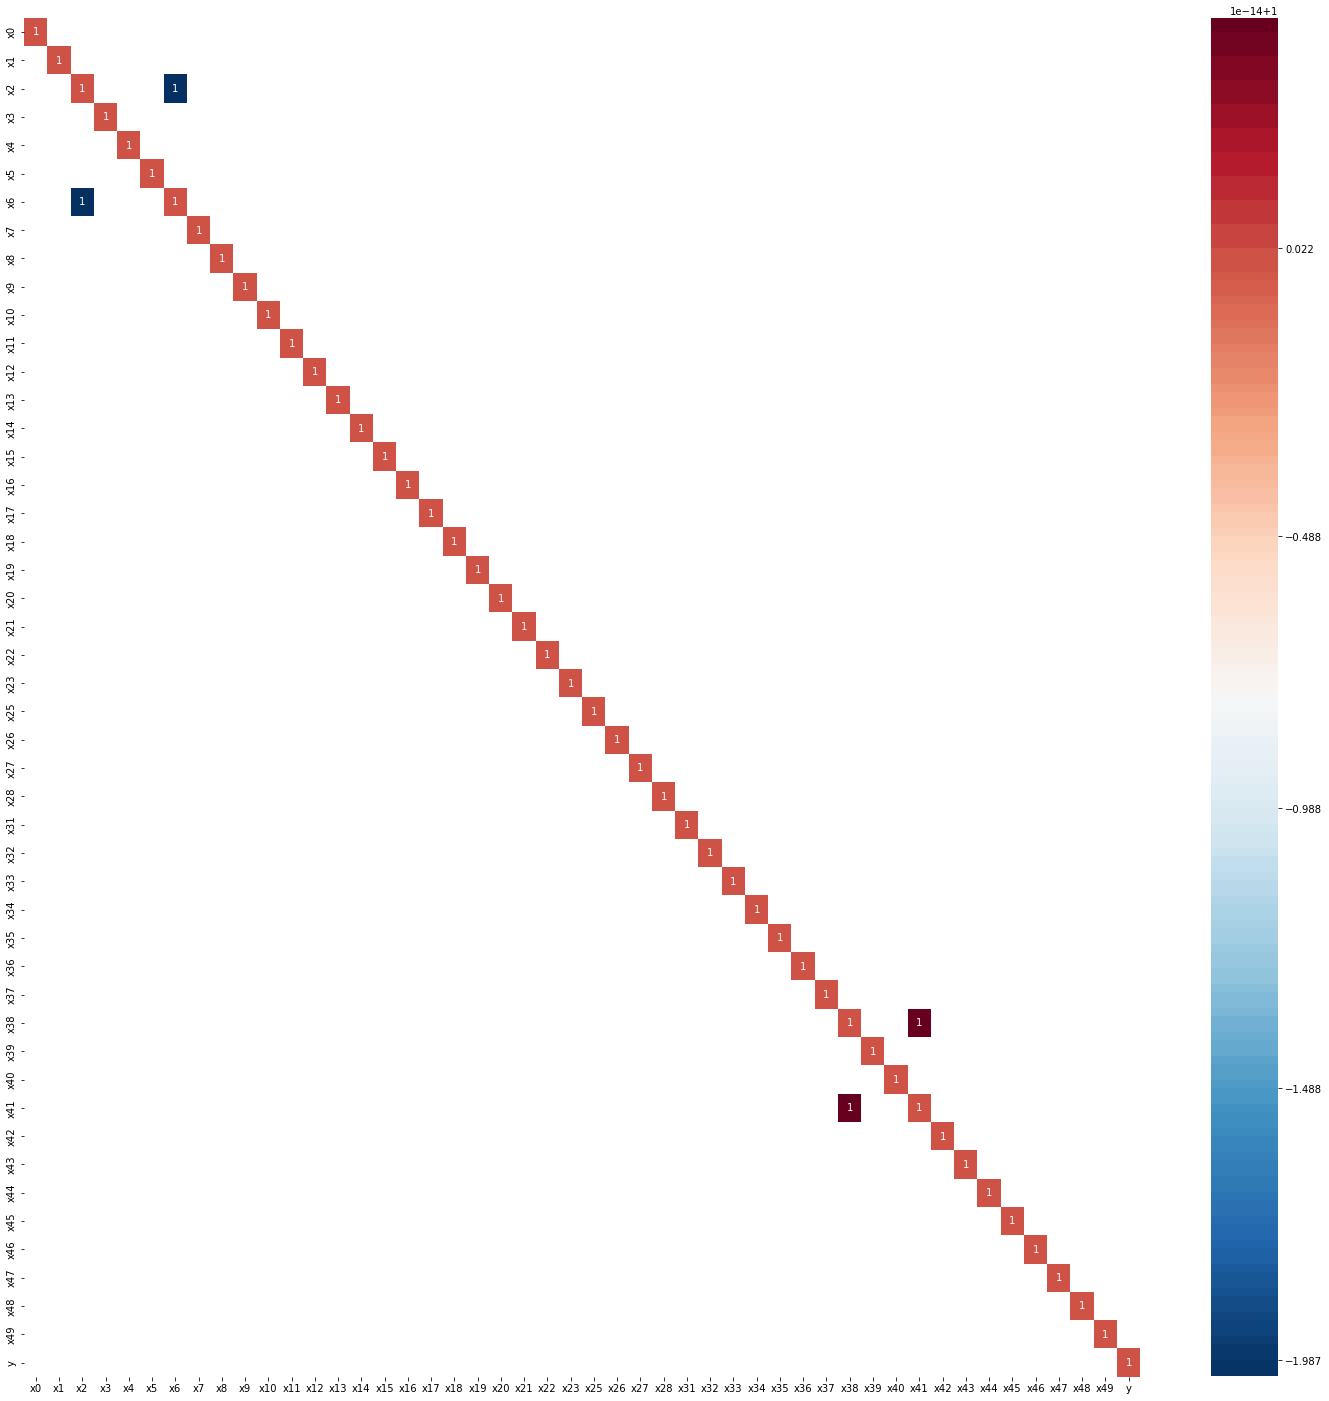

In [110]:
# Get correlation matrix for the dataset
corrMatrix = raw_data.corr()
plt.figure(figsize=(25,25))
corrMatrix = corrMatrix[corrMatrix>= 0.75]
# corrMatrix = corrMatrix[corrMatrix <= -0.75]
sns.heatmap(corrMatrix, cmap='RdBu_r', annot=True)
plt.show()

<AxesSubplot:xlabel='x2', ylabel='x6'>

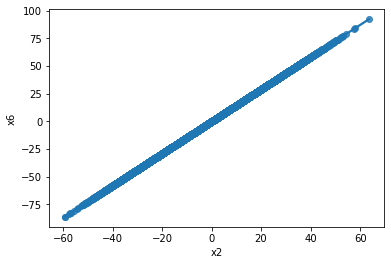

In [111]:
# Exploring the correlation between x2 and x6
sns.regplot(x=raw_data["x2"], y=raw_data["x6"])

<AxesSubplot:xlabel='x41', ylabel='x38'>

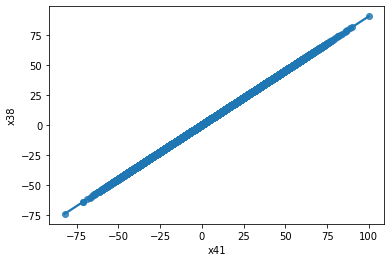

In [112]:
# Exploring the correlation between x41 and x38
sns.regplot(x=raw_data["x41"], y=raw_data["x38"])

### Data Evaluation Summary
* The dataset has 160000 rows and 51 columns
* The target variable y is binary and it is fairly balanced, 95k with 0 and 64k with 1.
* Converted variables x37(dollar amounts) and x32(percentages) into numerical/continous variables.
* There are 3 categorical variables x24,x29,x30.
* There are few very missing values.
* There are no duplicate values.
* The majority of the dataset 
    * for variable x24 has value 'Asia' infering it as collected from Asia.
    * for variable x29 has values April through Sept infering it as collected during the months of April through September.
    * for variable x30 has values Tuesday through Thursday infering it as collected during days Tuesday through Thursday.
* There is a very strong linear correlation between variables x2 & x6 and x41 & x38.

### Model Preparations

In [113]:
# Dropping correlated variables.
raw_data.drop(['x6', 'x38'], axis = 1)

,x0,x1,x2,x3,x4,x5,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,-14.789997,-1.040673,-4.204950,6.187465,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,-6.725709,0.896421,0.330165,-11.708859,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,11.060572,5.325880,-2.632984,1.572647,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-18.913592,-0.337041,-5.568076,-2.000255,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,27.532281,1.199715,-4.309105,6.667530,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,41.084463,-1.923188,-2.374213,-0.767600,...,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858,1
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,-12.278038,-3.861086,6.715126,-6.476405,...,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952,0
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,42.515821,1.420984,6.788916,-0.132832,...,-0.346570,-0.144098,0.738298,7.241041,0.215347,-12.155249,3.265263,1.230963,3.335471,1
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,-10.233054,2.609986,4.251127,-7.484309,...,-0.307656,-0.601145,-3.443112,0.549931,0.206728,5.081980,1.701462,-0.279619,-1.986424,0


In [114]:
# Encoding categorical variables.
df_encoded_data = pd.get_dummies(raw_data, columns = categorical_cols)

In [115]:
# Test and Train Split
X = df_encoded_data.loc[:, df_encoded_data.columns != 'y'].values
y = df_encoded_data['y'].astype('category').cat.codes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [116]:
# Imputation
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(X_train)
X_train= imputer.transform(X_train)
imputer = imputer.fit(X_test)
X_test= imputer.transform(X_test)

In [117]:
# Scaling data.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
cols = df_encoded_data.columns.values.tolist()
cols.remove('y')
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [118]:
# Check if there are any missing values after imputation.
X_train.isnull().sum()

x0               0
x1               0
x2               0
x3               0
x4               0
                ..
x30_friday       0
x30_monday       0
x30_thurday      0
x30_tuesday      0
x30_wednesday    0
Length: 67, dtype: int64

In [119]:
# Function to calculate the cost benefit matrix
def cost_benefit_matrix(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    cost_fp = fp * -100
    cost_fn = fn * -25
    Total_cost = cost_fp + cost_fn
    Total_cost_per_pred = Total_cost/(tn +fp +fn +tp)
    print("\nCost Benefit Matrix:-")
    print("Cost of false positive : ${0}".format(format(cost_fp, ',.2f')))
    print("Cost of false negative : ${0}".format(format(cost_fn, ',.2f')))
    print("Total cost: ${0}".format(format(Total_cost, ',.2f')))
    print("Cost per prediction: ${0}".format(format(Total_cost_per_pred, ',.2f')))


### Model Preparations Summary
* One of two strongly correlated variable in x2 & x6 and x41 & x38 are dropped.
* Categorical variables are one hot encodeded.
* Dataset is split 70:30 as train and test.
* We have features with wide range of values and hence the data is scaled.
* The few missing values which are missing at random are imputed with most frequent strategy.
* Built a function to calculate the cost benefit matrix. Every false +ve cost \\$100 and false -ve cost \\$25.

### Model Building
* Since this is a classification problem, the approach we are taking here is to start of with Random Forest model which is a collection of decision trees. This is know to be less prone to overfitting and more robutst.
* Next we will build some simple models based on parametric model like Logistic regression, and move to non-parametric models like KNN.
* Then end with building some advanced models like XGBoost and Neural Network Models.
* Hyper parameter tuning and Grid search will be performed for models where ever possible while building models.
* The key metric for model evaluation will be the cost benfit matrix along with Recall & Precision since there is a cost for false postive and false negative.
* Once the model building is done, best 3 models is chosen and an ensemble of models will be built to get the last performance boost.

#### RandomForest Models

In [120]:
model1_rf = RandomForestClassifier(random_state = 0)
model1_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [121]:
y_train1_rf = model1_rf.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train1_rf))
cost_benefit_matrix(confusion_matrix(y_train, y_train1_rf))
print("\n Classification Report \n",classification_report(y_train, y_train1_rf, digits=6))

Confusion Matrix 
 [[66976     0]
 [    1 45023]]

Cost Benefit Matrix:-
Cost of false positive : $0.00
Cost of false negative : $-25.00
Total cost: $-25.00
Cost per prediction: $-0.00

 Classification Report 
               precision    recall  f1-score   support

           0   0.999985  1.000000  0.999993     66976
           1   1.000000  0.999978  0.999989     45024

    accuracy                       0.999991    112000
   macro avg   0.999993  0.999989  0.999991    112000
weighted avg   0.999991  0.999991  0.999991    112000



In [122]:
y_test1_rf = model1_rf.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test1_rf))
cost_benefit_matrix(confusion_matrix(y_test, y_test1_rf))
print("\n Classification Report \n",classification_report(y_test, y_test1_rf, digits=6))

Confusion Matrix 
 [[27547  1280]
 [ 2585 16588]]

Cost Benefit Matrix:-
Cost of false positive : $-128,000.00
Cost of false negative : $-64,625.00
Total cost: $-192,625.00
Cost per prediction: $-4.01

 Classification Report 
               precision    recall  f1-score   support

           0   0.914211  0.955597  0.934446     28827
           1   0.928364  0.865175  0.895656     19173

    accuracy                       0.919479     48000
   macro avg   0.921287  0.910386  0.915051     48000
weighted avg   0.919864  0.919479  0.918952     48000



In [123]:
cost_benefit_matrix(confusion_matrix(y_test, y_test1_rf))


Cost Benefit Matrix:-
Cost of false positive : $-128,000.00
Cost of false negative : $-64,625.00
Total cost: $-192,625.00
Cost per prediction: $-4.01


#### Feature Importance

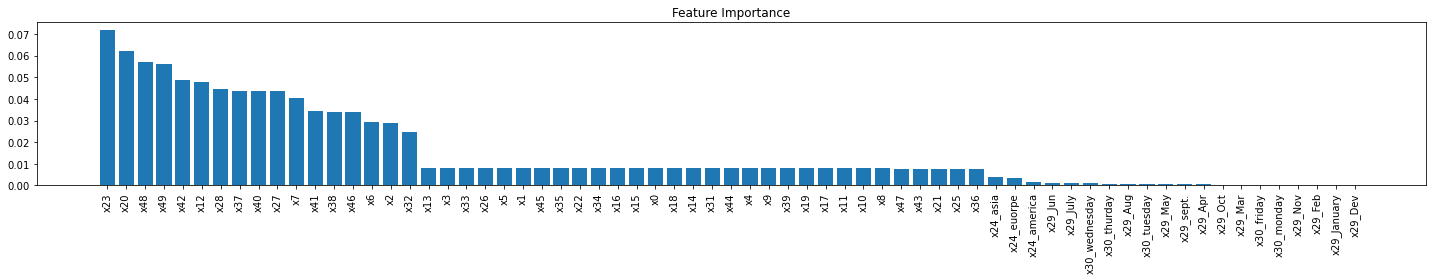

In [124]:
feature_importances = model1_rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(20,4))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

#### Top important features based on threshold

In [125]:
sfm = SelectFromModel(model1_rf, threshold=0.01)

# Train the selector
imp_features = []
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(cols[feature_list_index])
    imp_features.append(cols[feature_list_index])

x2
x6
x7
x12
x20
x23
x27
x28
x32
x37
x38
x40
x41
x42
x46
x48
x49


In [126]:
X_train = X_train[imp_features]
X_test = X_test[imp_features]

In [127]:
model2_rf = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split = 100, random_state = 2)
model2_rf.fit(X_train, y_train)
y_train2_rf = model2_rf.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train2_rf))
cost_benefit_matrix(confusion_matrix(y_train, y_train2_rf))
print("\n Classification Report \n",classification_report(y_train, y_train2_rf, digits=6))

Confusion Matrix 
 [[63547  3429]
 [ 8408 36616]]

Cost Benefit Matrix:-
Cost of false positive : $-342,900.00
Cost of false negative : $-210,200.00
Total cost: $-553,100.00
Cost per prediction: $-4.94

 Classification Report 
               precision    recall  f1-score   support

           0   0.883149  0.948803  0.914799     66976
           1   0.914371  0.813255  0.860854     45024

    accuracy                       0.894313    112000
   macro avg   0.898760  0.881029  0.887827    112000
weighted avg   0.895700  0.894312  0.893113    112000



In [128]:
y_test2_rf = model2_rf.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test2_rf))
cost_benefit_matrix(confusion_matrix(y_test, y_test2_rf))
print("\n Classification Report \n",classification_report(y_test, y_test2_rf, digits=6))

Confusion Matrix 
 [[27116  1711]
 [ 3937 15236]]

Cost Benefit Matrix:-
Cost of false positive : $-171,100.00
Cost of false negative : $-98,425.00
Total cost: $-269,525.00
Cost per prediction: $-5.62

 Classification Report 
               precision    recall  f1-score   support

           0   0.873217  0.940646  0.905678     28827
           1   0.899038  0.794659  0.843632     19173

    accuracy                       0.882333     48000
   macro avg   0.886127  0.867653  0.874655     48000
weighted avg   0.883531  0.882333  0.880895     48000



In [129]:
%%time
model3_rf = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [10,20],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=model3_rf, param_grid=param_grid, cv= 2,verbose=1)
CV_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
CPU times: user 8min 58s, sys: 2.78 s, total: 9min 1s
Wall time: 9min 4s


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100]},
             verbose=1)

In [130]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [131]:
model4_rf=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=20, criterion='entropy')
model4_rf.fit(X_train, y_train)
y_train4_rf = model4_rf.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train4_rf))
cost_benefit_matrix(confusion_matrix(y_train, y_train4_rf))
print("\n Classification Report \n",classification_report(y_train, y_train4_rf, digits=6))

Confusion Matrix 
 [[66946    30]
 [  141 44883]]

Cost Benefit Matrix:-
Cost of false positive : $-3,000.00
Cost of false negative : $-3,525.00
Total cost: $-6,525.00
Cost per prediction: $-0.06

 Classification Report 
               precision    recall  f1-score   support

           0   0.997898  0.999552  0.998724     66976
           1   0.999332  0.996868  0.998099     45024

    accuracy                       0.998473    112000
   macro avg   0.998615  0.998210  0.998412    112000
weighted avg   0.998475  0.998473  0.998473    112000



In [132]:
y_test4_rf = model4_rf.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test4_rf))
cost_benefit_matrix(confusion_matrix(y_test, y_test4_rf))
print("\n Classification Report \n",classification_report(y_test, y_test4_rf, digits=6))

Confusion Matrix 
 [[27685  1142]
 [ 1827 17346]]

Cost Benefit Matrix:-
Cost of false positive : $-114,200.00
Cost of false negative : $-45,675.00
Total cost: $-159,875.00
Cost per prediction: $-3.33

 Classification Report 
               precision    recall  f1-score   support

           0   0.938093  0.960384  0.949108     28827
           1   0.938230  0.904710  0.921165     19173

    accuracy                       0.938146     48000
   macro avg   0.938162  0.932547  0.935136     48000
weighted avg   0.938148  0.938146  0.937946     48000



#### Logistic Regression

In [133]:
model1_logr = LogisticRegression(solver='lbfgs', max_iter=1000)
model1_logr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [134]:
y_train1_logr = model1_logr.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train1_logr))
cost_benefit_matrix(confusion_matrix(y_train, y_train1_logr))
print("\n Classification Report \n",classification_report(y_train, y_train1_logr, digits=6))

Confusion Matrix 
 [[55319 11657]
 [21716 23308]]

Cost Benefit Matrix:-
Cost of false positive : $-1,165,700.00
Cost of false negative : $-542,900.00
Total cost: $-1,708,600.00
Cost per prediction: $-15.26

 Classification Report 
               precision    recall  f1-score   support

           0   0.718102  0.825953  0.768261     66976
           1   0.666609  0.517679  0.582780     45024

    accuracy                       0.702027    112000
   macro avg   0.692356  0.671816  0.675520    112000
weighted avg   0.697402  0.702027  0.693698    112000



In [135]:
y_test1_logr = model1_logr.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test1_logr))
cost_benefit_matrix(confusion_matrix(y_test, y_test1_logr))
print("\n Classification Report \n",classification_report(y_test, y_test1_logr, digits=6))

Confusion Matrix 
 [[23860  4967]
 [ 9235  9938]]

Cost Benefit Matrix:-
Cost of false positive : $-496,700.00
Cost of false negative : $-230,875.00
Total cost: $-727,575.00
Cost per prediction: $-15.16

 Classification Report 
               precision    recall  f1-score   support

           0   0.720955  0.827696  0.770647     28827
           1   0.666756  0.518333  0.583250     19173

    accuracy                       0.704125     48000
   macro avg   0.693855  0.673015  0.676949     48000
weighted avg   0.699306  0.704125  0.695794     48000



#### KNN

In [136]:
model1_knn = KNeighborsClassifier(n_neighbors=5)
model1_knn.fit(X_train, y_train)
y_train1_knn = model1_knn.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train1_knn))
cost_benefit_matrix(confusion_matrix(y_train, y_train1_knn))
print("\n Classification Report \n",classification_report(y_train, y_train1_knn, digits=6))

Confusion Matrix 
 [[65245  1731]
 [ 1955 43069]]

Cost Benefit Matrix:-
Cost of false positive : $-173,100.00
Cost of false negative : $-48,875.00
Total cost: $-221,975.00
Cost per prediction: $-1.98

 Classification Report 
               precision    recall  f1-score   support

           0   0.970908  0.974155  0.972529     66976
           1   0.961362  0.956579  0.958964     45024

    accuracy                       0.967089    112000
   macro avg   0.966135  0.965367  0.965746    112000
weighted avg   0.967070  0.967089  0.967076    112000



In [137]:
y_test1_knn = model1_knn.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test1_knn))
cost_benefit_matrix(confusion_matrix(y_test, y_test1_knn))
print("\n Classification Report \n",classification_report(y_test, y_test1_knn, digits=6))

Confusion Matrix 
 [[27705  1122]
 [ 1218 17955]]

Cost Benefit Matrix:-
Cost of false positive : $-112,200.00
Cost of false negative : $-30,450.00
Total cost: $-142,650.00
Cost per prediction: $-2.97

 Classification Report 
               precision    recall  f1-score   support

           0   0.957888  0.961078  0.959481     28827
           1   0.941186  0.936473  0.938824     19173

    accuracy                       0.951250     48000
   macro avg   0.949537  0.948776  0.949152     48000
weighted avg   0.951217  0.951250  0.951229     48000



#### XGBoost

In [138]:
model1_xgb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_depth=2, random_state=0).fit(X_train, y_train)
y_train1_xgb = model1_xgb.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train1_xgb))
cost_benefit_matrix(confusion_matrix(y_train, y_train1_xgb))
print("\n Classification Report \n",classification_report(y_train, y_train1_xgb, digits=6))

Confusion Matrix 
 [[58025  8951]
 [15330 29694]]

Cost Benefit Matrix:-
Cost of false positive : $-895,100.00
Cost of false negative : $-383,250.00
Total cost: $-1,278,350.00
Cost per prediction: $-11.41

 Classification Report 
               precision    recall  f1-score   support

           0   0.791016  0.866355  0.826973     66976
           1   0.768379  0.659515  0.709797     45024

    accuracy                       0.783205    112000
   macro avg   0.779698  0.762935  0.768385    112000
weighted avg   0.781916  0.783205  0.779868    112000



In [139]:
y_test1_xgb = model1_xgb.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test1_xgb))
cost_benefit_matrix(confusion_matrix(y_test, y_test1_xgb))
print("\n Classification Report \n",classification_report(y_test, y_test1_xgb, digits=6))

Confusion Matrix 
 [[25004  3823]
 [ 6644 12529]]

Cost Benefit Matrix:-
Cost of false positive : $-382,300.00
Cost of false negative : $-166,100.00
Total cost: $-548,400.00
Cost per prediction: $-11.43

 Classification Report 
               precision    recall  f1-score   support

           0   0.790066  0.867381  0.826920     28827
           1   0.766206  0.653471  0.705362     19173

    accuracy                       0.781937     48000
   macro avg   0.778136  0.760426  0.766141     48000
weighted avg   0.780535  0.781937  0.778365     48000



In [140]:
parameters = {
    "learning_rate": [0.2,0.5,0.7],
    "min_samples_leaf": [0.1, 0.5],
    "max_depth":[10,20],
    "n_estimators":[50,100]
    }

xgb_clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=2, n_jobs=-1)
xgb_clf.fit(X_train, y_train)
xgb_clf.best_params_

{'learning_rate': 0.7,
 'max_depth': 10,
 'min_samples_leaf': 0.1,
 'n_estimators': 100}

In [141]:
model2_xgb = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=0.1, learning_rate=0.7, max_depth=20, random_state=0).fit(X_train, y_train)
y_train2_xgb = model2_xgb.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train2_xgb))
cost_benefit_matrix(confusion_matrix(y_train, y_train2_xgb))
print("\n Classification Report \n",classification_report(y_train, y_train2_xgb, digits=6))

Confusion Matrix 
 [[62099  4877]
 [ 5991 39033]]

Cost Benefit Matrix:-
Cost of false positive : $-487,700.00
Cost of false negative : $-149,775.00
Total cost: $-637,475.00
Cost per prediction: $-5.69

 Classification Report 
               precision    recall  f1-score   support

           0   0.912014  0.927183  0.919536     66976
           1   0.888932  0.866938  0.877797     45024

    accuracy                       0.902964    112000
   macro avg   0.900473  0.897060  0.898666    112000
weighted avg   0.902735  0.902964  0.902757    112000



In [142]:
y_test2_xgb = model2_xgb.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test2_xgb))
cost_benefit_matrix(confusion_matrix(y_test, y_test2_xgb))
print("\n Classification Report \n",classification_report(y_test, y_test2_xgb, digits=6))

Confusion Matrix 
 [[26541  2286]
 [ 2649 16524]]

Cost Benefit Matrix:-
Cost of false positive : $-228,600.00
Cost of false negative : $-66,225.00
Total cost: $-294,825.00
Cost per prediction: $-6.14

 Classification Report 
               precision    recall  f1-score   support

           0   0.909250  0.920699  0.914939     28827
           1   0.878469  0.861837  0.870073     19173

    accuracy                       0.897188     48000
   macro avg   0.893859  0.891268  0.892506     48000
weighted avg   0.896955  0.897188  0.897018     48000



#### Neural Network Model

In [143]:
model1_cnn = Sequential()
#First Hidden Layer
model1_cnn.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=17))
#Output Layer
model1_cnn.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model1_cnn.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
history1 = model1_cnn.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
8960/8960 [==============================] - 7s 744us/step - loss: 0.5370 - accuracy: 0.7317 - val_loss: 0.4580 - val_accuracy: 0.7858
Epoch 2/80
8960/8960 [==============================] - 6s 683us/step - loss: 0.4508 - accuracy: 0.7883 - val_loss: 0.4342 - val_accuracy: 0.8012
Epoch 3/80
8960/8960 [==============================] - 6s 694us/step - loss: 0.4240 - accuracy: 0.8089 - val_loss: 0.4033 - val_accuracy: 0.8286
Epoch 4/80
8960/8960 [==============================] - 6s 712us/step - loss: 0.3954 - accuracy: 0.8295 - val_loss: 0.3817 - val_accuracy: 0.8375
Epoch 5/80
8960/8960 [==============================] - 7s 754us/step - loss: 0.3767 - accuracy: 0.8386 - val_loss: 0.3733 - val_accuracy: 0.8415
Epoch 6/80
8960/8960 [==============================] - 7s 729us/step - loss: 0.3674 - accuracy: 0.8426 - val_loss: 0.3703 - val_accuracy: 0.8411
Epoch 7/80
8960/8960 [==============================] - 6s 718us/step - loss: 0.3646 - accuracy: 0.8421 - val_loss: 0.3674 -

In [144]:
y_train1_cnn = np.round(model1_cnn.predict(X_train),0)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train1_cnn))
cost_benefit_matrix(confusion_matrix(y_train, y_train1_cnn))
print("\n Classification Report \n",classification_report(y_train, y_train1_cnn, digits=6))

Confusion Matrix 
 [[59467  7509]
 [ 9880 35144]]

Cost Benefit Matrix:-
Cost of false positive : $-750,900.00
Cost of false negative : $-247,000.00
Total cost: $-997,900.00
Cost per prediction: $-8.91

 Classification Report 
               precision    recall  f1-score   support

           0   0.857528  0.887885  0.872443     66976
           1   0.823951  0.780561  0.801670     45024

    accuracy                       0.844741    112000
   macro avg   0.840740  0.834223  0.837056    112000
weighted avg   0.844030  0.844741  0.843992    112000



In [145]:
y_test1_cnn = np.round(model1_cnn.predict(X_test),0)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test1_cnn))
cost_benefit_matrix(confusion_matrix(y_test, y_test1_cnn))
print("\n Classification Report \n",classification_report(y_test, y_test1_cnn, digits=6))

Confusion Matrix 
 [[25630  3197]
 [ 4173 15000]]

Cost Benefit Matrix:-
Cost of false positive : $-319,700.00
Cost of false negative : $-104,325.00
Total cost: $-424,025.00
Cost per prediction: $-8.83

 Classification Report 
               precision    recall  f1-score   support

           0   0.859981  0.889097  0.874296     28827
           1   0.824312  0.782350  0.802783     19173

    accuracy                       0.846458     48000
   macro avg   0.842146  0.835724  0.838540     48000
weighted avg   0.845733  0.846458  0.845731     48000



In [146]:
model2_cnn = Sequential()
#First Hidden Layer
model2_cnn.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=17))
#Second Hidden Layer
model2_cnn.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
model2_cnn.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model2_cnn.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
history2 = model2_cnn.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
8960/8960 [==============================] - 7s 789us/step - loss: 0.5375 - accuracy: 0.7301 - val_loss: 0.3996 - val_accuracy: 0.8294
Epoch 2/80
8960/8960 [==============================] - 7s 747us/step - loss: 0.3913 - accuracy: 0.8351 - val_loss: 0.3848 - val_accuracy: 0.8357
Epoch 3/80
8960/8960 [==============================] - 7s 755us/step - loss: 0.3848 - accuracy: 0.8356 - val_loss: 0.3773 - val_accuracy: 0.8360
Epoch 4/80
8960/8960 [==============================] - 7s 742us/step - loss: 0.3777 - accuracy: 0.8373 - val_loss: 0.3751 - val_accuracy: 0.8408
Epoch 5/80
8960/8960 [==============================] - 7s 746us/step - loss: 0.3711 - accuracy: 0.8408 - val_loss: 0.3720 - val_accuracy: 0.8423
Epoch 6/80
8960/8960 [==============================] - 7s 819us/step - loss: 0.3721 - accuracy: 0.8398 - val_loss: 0.3705 - val_accuracy: 0.8425
Epoch 7/80
8960/8960 [==============================] - 7s 754us/step - loss: 0.3693 - accuracy: 0.8416 - val_loss: 0.3680 -

In [147]:
y_train2_cnn = np.round(model2_cnn.predict(X_train),0)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train2_cnn))
cost_benefit_matrix(confusion_matrix(y_train, y_train2_cnn))
print("\n Classification Report \n",classification_report(y_train, y_train2_cnn, digits=6))

Confusion Matrix 
 [[58955  8021]
 [ 9415 35609]]

Cost Benefit Matrix:-
Cost of false positive : $-802,100.00
Cost of false negative : $-235,375.00
Total cost: $-1,037,475.00
Cost per prediction: $-9.26

 Classification Report 
               precision    recall  f1-score   support

           0   0.862293  0.880241  0.871175     66976
           1   0.816159  0.790889  0.803325     45024

    accuracy                       0.844321    112000
   macro avg   0.839226  0.835565  0.837250    112000
weighted avg   0.843747  0.844321  0.843899    112000



In [148]:
y_test2_cnn = np.round(model2_cnn.predict(X_test),0)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test2_cnn))
cost_benefit_matrix(confusion_matrix(y_test, y_test2_cnn))
print("\n Classification Report \n",classification_report(y_test, y_test2_cnn, digits=6))

Confusion Matrix 
 [[25363  3464]
 [ 4015 15158]]

Cost Benefit Matrix:-
Cost of false positive : $-346,400.00
Cost of false negative : $-100,375.00
Total cost: $-446,775.00
Cost per prediction: $-9.31

 Classification Report 
               precision    recall  f1-score   support

           0   0.863333  0.879835  0.871506     28827
           1   0.813983  0.790591  0.802117     19173

    accuracy                       0.844187     48000
   macro avg   0.838658  0.835213  0.836811     48000
weighted avg   0.843621  0.844187  0.843789     48000



#### Ensemble 

In [149]:
ensemble_soft_evc = EnsembleVoteClassifier(clfs=[model4_rf,model1_knn,model2_xgb], voting='soft', weights=[1,1,1])
ensemble_soft_evc.fit(X_train, y_train)

print('soft ensemble: {}'.format(ensemble_soft_evc.score(X_test, y_test)))

soft ensemble: 0.9447708333333333


In [150]:
y_train_en_soft_evc= ensemble_soft_evc.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train_en_soft_evc))
cost_benefit_matrix(confusion_matrix(y_train, y_train_en_soft_evc))
print("\n Classification Report \n",classification_report(y_train, y_train_en_soft_evc, digits=6))

Confusion Matrix 
 [[65795  1181]
 [ 1651 43373]]

Cost Benefit Matrix:-
Cost of false positive : $-118,100.00
Cost of false negative : $-41,275.00
Total cost: $-159,375.00
Cost per prediction: $-1.42

 Classification Report 
               precision    recall  f1-score   support

           0   0.975521  0.982367  0.978932     66976
           1   0.973493  0.963331  0.968385     45024

    accuracy                       0.974714    112000
   macro avg   0.974507  0.972849  0.973659    112000
weighted avg   0.974706  0.974714  0.974692    112000



In [151]:
y_test_en_soft_evc= ensemble_soft_evc.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test_en_soft_evc))
cost_benefit_matrix(confusion_matrix(y_test, y_test_en_soft_evc))
print("\n Classification Report \n",classification_report(y_test, y_test_en_soft_evc, digits=6))

Confusion Matrix 
 [[27666  1161]
 [ 1490 17683]]

Cost Benefit Matrix:-
Cost of false positive : $-116,100.00
Cost of false negative : $-37,250.00
Total cost: $-153,350.00
Cost per prediction: $-3.19

 Classification Report 
               precision    recall  f1-score   support

           0   0.948896  0.959725  0.954280     28827
           1   0.938389  0.922287  0.930268     19173

    accuracy                       0.944771     48000
   macro avg   0.943642  0.941006  0.942274     48000
weighted avg   0.944699  0.944771  0.944689     48000



In [152]:
ensemble_soft_wgt_evc = EnsembleVoteClassifier(clfs=[model4_rf,model1_knn,model2_xgb], voting='soft', weights=[.4,.3,.3])
ensemble_soft_wgt_evc.fit(X_train, y_train)

y_train_en_soft_wgt_evc= ensemble_soft_wgt_evc.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train_en_soft_wgt_evc))
cost_benefit_matrix(confusion_matrix(y_train, y_train_en_soft_wgt_evc))
print("\n Classification Report \n",classification_report(y_train, y_train_en_soft_wgt_evc, digits=6))

Confusion Matrix 
 [[65994   982]
 [ 1442 43582]]

Cost Benefit Matrix:-
Cost of false positive : $-98,200.00
Cost of false negative : $-36,050.00
Total cost: $-134,250.00
Cost per prediction: $-1.20

 Classification Report 
               precision    recall  f1-score   support

           0   0.978617  0.985338  0.981966     66976
           1   0.977964  0.967973  0.972943     45024

    accuracy                       0.978357    112000
   macro avg   0.978291  0.976655  0.977454    112000
weighted avg   0.978354  0.978357  0.978339    112000



In [153]:
y_test_en_soft_wgt_evc= ensemble_soft_wgt_evc.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test_en_soft_wgt_evc))
cost_benefit_matrix(confusion_matrix(y_test, y_test_en_soft_wgt_evc))
print("\n Classification Report \n",classification_report(y_test, y_test_en_soft_wgt_evc, digits=6))

Confusion Matrix 
 [[27689  1138]
 [ 1508 17665]]

Cost Benefit Matrix:-
Cost of false positive : $-113,800.00
Cost of false negative : $-37,700.00
Total cost: $-151,500.00
Cost per prediction: $-3.16

 Classification Report 
               precision    recall  f1-score   support

           0   0.948351  0.960523  0.954398     28827
           1   0.939478  0.921348  0.930324     19173

    accuracy                       0.944875     48000
   macro avg   0.943914  0.940935  0.942361     48000
weighted avg   0.944807  0.944875  0.944782     48000



In [ ]:
ensemble_hard_evc = EnsembleVoteClassifier(clfs=[model4_rf,model1_knn,model2_xgb], voting='hard')
ensemble_hard_evc.fit(X_train, y_train)

y_train_en_hard_evc= ensemble_hard_evc.predict(X_train)
print("Confusion Matrix \n",confusion_matrix(y_train, y_train_en_hard_evc))
cost_benefit_matrix(confusion_matrix(y_train, y_train_en_hard_evc))
print("\n Classification Report \n",classification_report(y_train, y_train_en_hard_evc, digits=6))
print('Hard ensemble: {}'.format(ensemble_hard_evc.score(X_test, y_test)))

Confusion Matrix 
 [[65859  1117]
 [ 1422 43602]]

Cost Benefit Matrix:-
Cost of false positive : $-111,700.00
Cost of false negative : $-35,550.00
Total cost: $-147,250.00
Cost per prediction: $-1.31

 Classification Report 
               precision    recall  f1-score   support

           0   0.978865  0.983322  0.981089     66976
           1   0.975022  0.968417  0.971708     45024

    accuracy                       0.977330    112000
   macro avg   0.976943  0.975870  0.976398    112000
weighted avg   0.977320  0.977330  0.977318    112000



In [ ]:
y_test_en_hard_evc= ensemble_hard_evc.predict(X_test)
print("Confusion Matrix \n",confusion_matrix(y_test, y_test_en_hard_evc))
cost_benefit_matrix(confusion_matrix(y_test, y_test_en_hard_evc))
print("\n Classification Report \n",classification_report(y_test, y_test_en_hard_evc, digits=6))

### Model Building Summary
* We have 51 features in total and the top 17 features(threshold of 0.01) for classification turned out to be x2,x6,x7,x12,x20,x23,x27,x28,x32,x37,x38,x40,x41,x42,x46,x48,x49. The other features are not used in the models.
* Below are the best models after building mutliple models performing hyper parameters tuning and grid search for each algorithm.

* From the above models based on cost benefit analysis Total cost, Precision and Recall, we have chosen KNN, Random Forest and XGBoost, the top 3 models that performed well for ensembling. They also generalized well with train and test dataset.
* While ensembling different stragies such as soft, soft with weights giving more weight to Random forest since that is best model and hard were evaluated. All of them peformed well and we chose the one with soft voting with weighted average(rf:0.4, knn:0.3, xgb:0.3). Below is our final model for this case study.

### Monetary Outcome
* We know from the ask that predicting class 1 incorrectly costs the \\$100 and incorrectly predicting class 0 costs \\$25, but there is no monetary cost for correct predictions. We have built a model that could limit the cost of wrong predictions. The model we recommending above will bring down the overall avg cost of wrong prediction to 3.06 if it happens.


### Conclusion
* Overall, for this classification case study where the goal is to minimize the cost of wrong predictions, we explored data, did feature engineering and built close to 6 different models.
* We then picked the best 3 models did an ensembling to get last performance boost.
* The model that we presented above has a good cost benefit analysis where we limit the average cost of wrong prediction to around \\$3.00 per ocurrence.